In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

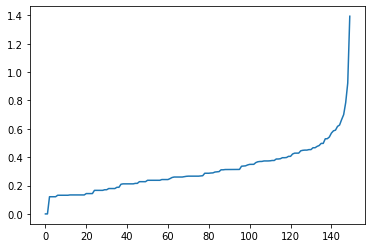

In [3]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

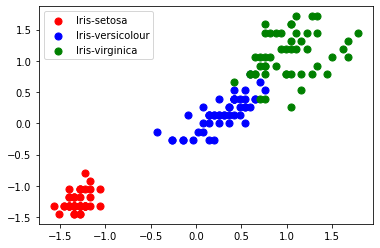

In [4]:
# for iris data set
plt.scatter(X[y == 0, 2], X[y == 0, 3], s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y == 1, 2], X[y == 1, 3], s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y == 2, 2], X[y == 2, 3], s = 50, c = 'green', label = 'Iris-virginica')
plt.legend()

The silhouette score of Partition-based (KMeans) is : 0.45994823920518635 
The silhouette score of Density-based (DBSCAN) is : 0.18059754653658136 
The silhouette score of Hierarchical (Birch) is : 0.4535501305989079 





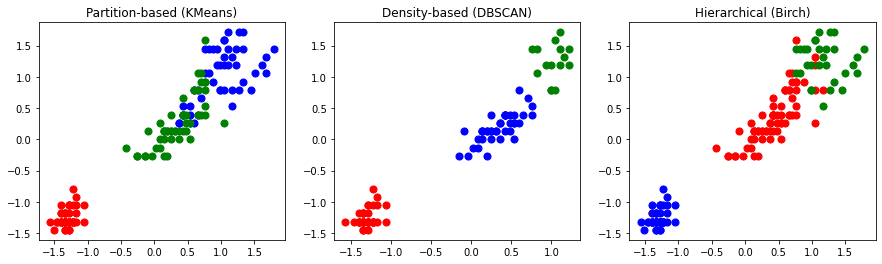

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
# for kmeans
kmeans = KMeans(n_clusters=3,random_state=42).fit(X)
label = list(set(kmeans.labels_))
ax1.set_title('Partition-based (KMeans)')
ax1.scatter(X[kmeans.labels_ == label[0], 2], X[kmeans.labels_ == label[0], 3], s = 50, c = 'red')
ax1.scatter(X[kmeans.labels_ == label[1], 2], X[kmeans.labels_ == label[1], 3], s = 50, c = 'blue')
ax1.scatter(X[kmeans.labels_ == label[2], 2], X[kmeans.labels_ == label[2], 3], s = 50, c = 'green')
score = silhouette_score(X, kmeans.labels_)
print(f"The silhouette score of Partition-based (KMeans) is : {score} ")

# for dbscan
dbscan = DBSCAN(eps=.45, min_samples=5).fit(X)
label = list(set(dbscan.labels_))
ax2.set_title('Density-based (DBSCAN)')
ax2.scatter(X[dbscan.labels_ == label[0], 2], X[dbscan.labels_ == label[0], 3], s = 50, c = 'red')
ax2.scatter(X[dbscan.labels_ == label[1], 2], X[dbscan.labels_ == label[1], 3], s = 50, c = 'blue')
ax2.scatter(X[dbscan.labels_ == label[2], 2], X[dbscan.labels_ == label[2], 3], s = 50, c = 'green')
score = silhouette_score(X, dbscan.labels_)
print(f"The silhouette score of Density-based (DBSCAN) is : {score} ")

# Birch
brc = Birch(n_clusters=3).fit(X)
label = list(set(brc.labels_))
ax3.set_title('Hierarchical (Birch)')
ax3.scatter(X[brc.labels_ == label[0], 2], X[brc.labels_ == label[0], 3], s = 50, c = 'red')
ax3.scatter(X[brc.labels_ == label[1], 2], X[brc.labels_ == label[1], 3], s = 50, c = 'blue')
ax3.scatter(X[brc.labels_ == label[2], 2], X[brc.labels_ == label[2], 3], s = 50, c = 'green')
score = silhouette_score(X, brc.labels_)
print(f"The silhouette score of Hierarchical (Birch) is : {score} \n\n\n")
fig.show()

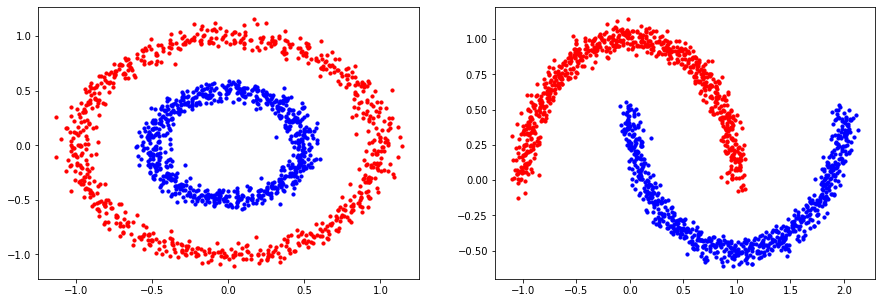

In [6]:
# making smone noisy dataset
n_samples= 1500
noisy_circles = datasets.make_circles(n_samples=n_samples,factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples,noise=.05)
noise_data = [noisy_circles,noisy_moons]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
index = 0
for data in noise_data:
  X= data[0]
  y= data[1]
  ax[index].scatter(X[y==0, 0], X[y==0, 1], color="r", s=10)
  ax[index].scatter(X[y==1, 0], X[y==1, 1], color="b", s=10)
  index+=1
fig.show()

The silhouette score of Partition-based (KMeans) of [0,0] is: 0.35343107549909736 
The silhouette score of Density-based (DBSCAN) of [0,1] is: 0.11388734823803047 
The silhouette score of Hierarchical (Birch) of [0,2] is: 0.3015030076755952 



The silhouette score of Partition-based (KMeans) of [1,0] is: 0.48946933693507183 
The silhouette score of Density-based (DBSCAN) of [1,1] is: 0.33487106023931534 
The silhouette score of Hierarchical (Birch) of [1,2] is: 0.47123117512594037 





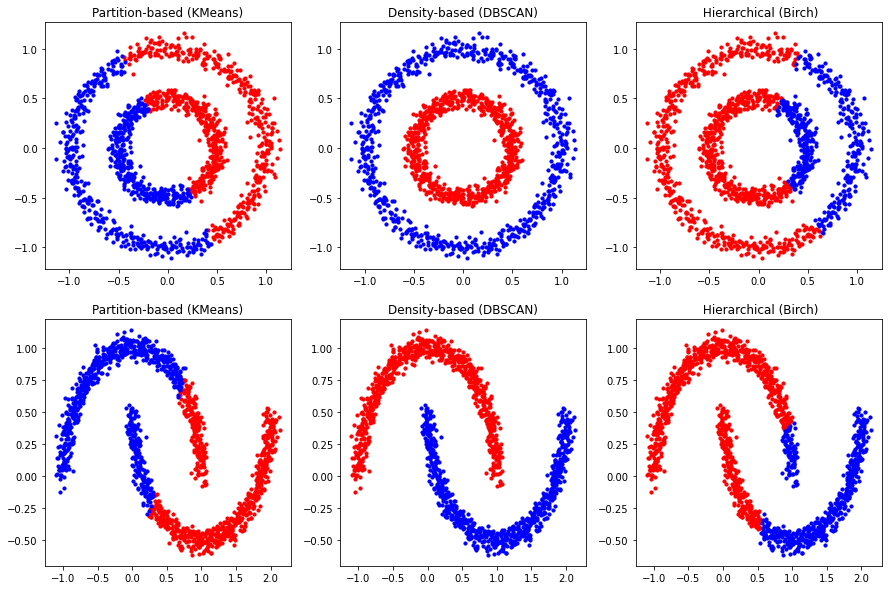

In [7]:
index = 0 
fig, ax = plt.subplots(2,3, figsize=(15,10))
for data in noise_data:
  X= data[0]
  y= data[1]
  # for kmeans
  kmeans = KMeans(n_clusters=2,random_state=42).fit(X)
  label = list(set(kmeans.labels_))
  ax[index,0].set_title('Partition-based (KMeans)')
  ax[index,0].scatter(X[kmeans.labels_ == label[0], 0], X[kmeans.labels_ == label[0], 1], s = 10, c = 'red')
  ax[index,0].scatter(X[kmeans.labels_ == label[1], 0], X[kmeans.labels_ == label[1], 1], s = 10, c = 'blue')
  score = silhouette_score(X, kmeans.labels_)
  print(f"The silhouette score of Partition-based (KMeans) of [{index},0] is: {score} ")

  # for dbscan
  dbscan = DBSCAN(eps=.18).fit(X)
  label = list(set(dbscan.labels_))
  ax[index,1].set_title('Density-based (DBSCAN)')
  ax[index,1].scatter(X[dbscan.labels_ == label[0], 0], X[dbscan.labels_ == label[0], 1], s = 10, c = 'red')
  ax[index,1].scatter(X[dbscan.labels_ == label[1], 0], X[dbscan.labels_ == label[1], 1], s = 10, c = 'blue')
  score = silhouette_score(X, dbscan.labels_)
  print(f"The silhouette score of Density-based (DBSCAN) of [{index},1] is: {score} ")

  # Birch
  brc = Birch(n_clusters=2).fit(X)
  label = list(set(brc.labels_))
  ax[index,2].set_title(' Hierarchical (Birch)')
  ax[index,2].scatter(X[brc.labels_ == label[0], 0], X[brc.labels_ == label[0], 1], s = 10, c = 'red')
  ax[index,2].scatter(X[brc.labels_ == label[1], 0], X[brc.labels_ == label[1], 1], s = 10, c = 'blue')
  score = silhouette_score(X, brc.labels_)
  print(f"The silhouette score of Hierarchical (Birch) of [{index},2] is: {score} \n\n\n")
  index+=1
fig.show()